# Week 01 — Hello Finance

This notebook introduces basic financial data analysis in Python.  
Goals:
- Pull historical data for an ETF (e.g. SPY).
- Compute returns, volatility, Sharpe ratio, and max drawdown.
- Visualize price, drawdowns, and rolling volatility.

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

# load SPY daily prices (10y history)
ticker = "SPY"
data = yf.download(ticker, start="2015-01-01", end="2025-01-01")
data = data['Close']
data.head()

/var/folders/_b/f4pn4hmx5rd9lmgdpr_6h3740000gn/T/ipykernel_45308/1984208525.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="2015-01-01", end="2025-01-01")
[*********************100%***********************]  1 of 1 completed


Ticker,SPY
Date,
2015-01-02,171.568054
2015-01-05,168.469543
2015-01-06,166.882782
2015-01-07,168.962341
2015-01-08,171.960556


In [34]:
returns = data.pct_change().dropna()
cum_returns = (1 + returns).cumprod()

In [35]:
def sharpe_ratio(r, rf=0.0, periods=252):
    excess = r - rf/periods
    return np.sqrt(periods) * excess.mean() / excess.std()

def max_drawdown(cumret):
    roll_max = cumret.cummax()
    dd = cumret / roll_max - 1
    return dd.min()

ann_return = ((1 + returns.mean())**252 - 1).iloc[0]
ann_vol = (returns.std() * np.sqrt(252)).iloc[0]
print(ann_vol)
sharpe = sharpe_ratio(returns).iloc[0]
mdd = max_drawdown(cum_returns).iloc[0]

print(f"Annualized return: {ann_return:.2%}")
print(f"Annualized volatility: {ann_vol:.2%}")
print(f"Sharpe ratio: {sharpe:.2f}")
print(f"Max drawdown: {mdd:.2%}")

0.1761918823737287
Annualized return: 14.81%
Annualized volatility: 17.62%
Sharpe ratio: 0.78
Max drawdown: -33.72%


<Figure size 1000x400 with 0 Axes>

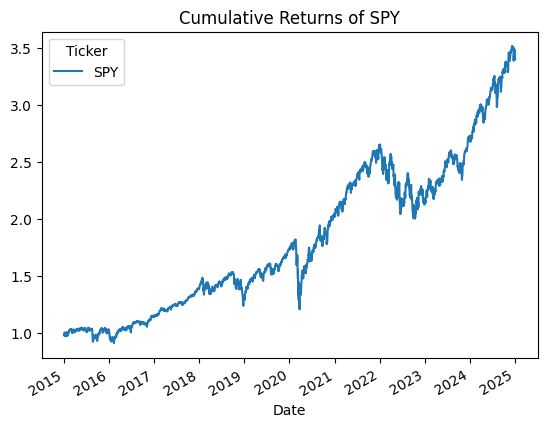

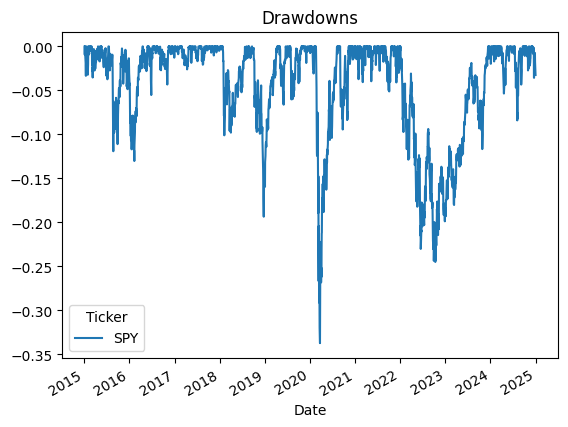

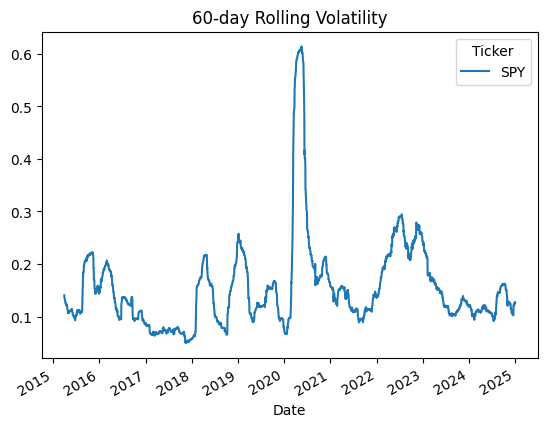

In [36]:
plt.figure(figsize=(10,4))
cum_returns.plot(title=f"Cumulative Returns of {ticker}")
plt.show()

# Drawdown plot
roll_max = cum_returns.cummax()
drawdown = cum_returns / roll_max - 1
drawdown.plot(title="Drawdowns")
plt.show()

# Rolling volatility
(returns.rolling(60).std() * np.sqrt(252)).plot(title="60-day Rolling Volatility")
plt.show()

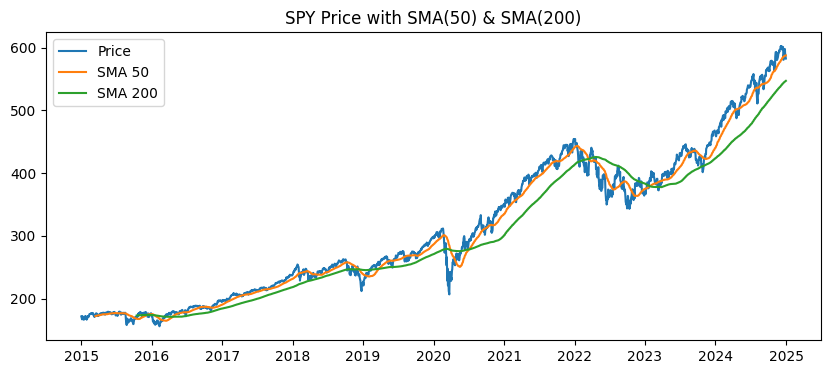

In [37]:
sma50 = data.rolling(50).mean()
sma200 = data.rolling(200).mean()

plt.figure(figsize=(10,4))

plt.plot(data.index, data, label="Price")
plt.plot(sma50.index, sma50, label="SMA 50")
plt.plot(sma200.index, sma200, label="SMA 200")

plt.title("SPY Price with SMA(50) & SMA(200)")
plt.legend()
plt.show()

## Insights
- SPY had an annualized return of ~14.81% and volatility of ~17.62% over the last 10 years.
- The Sharpe ratio was 0.78, suggesting limited risk-adjusted performance.
- Maximum drawdown was around -33.72%, highlighting exposure during crises.
- SMA crossovers (50 vs 200) show momentum regimes, which can be extended into strategies in later weeks.